In [1]:
import pandas as pd
import matplotlib 
import sys
import numpy.random as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
X=iris.data
Y=iris.target

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=243)

In [5]:
from sklearn.metrics import recall_score

In [29]:
depth=1
r_sc=0
while r_sc< 0.8:
    dt=DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    clf= dt.fit(X_train,Y_train)
    y_pred=dt.predict(X_test)
    r_sc=recall_score(Y_test,y_pred,average='micro')
    print(r_sc)
    print(depth)
    depth+=1
    

0.6
1
0.96
2


In [11]:
from sklearn.datasets import load_wine
wine = load_wine
Xw=wine().data
Yw=wine().target

In [12]:
Xw

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
dfw=pd.DataFrame(Xw)
dfw

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
dfy=pd.DataFrame(Yw)
dfy.sort_values(by=[0])


,0
0,0
32,0
33,0
34,0
35,0
...,...
148,2
149,2
150,2
152,2


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

In [35]:
clf=DecisionTreeClassifier()

In [36]:
parametrs = { 'recall_score': range (85,100),
              'max_depth': range (1,10)
              }

In [37]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, Y_train)

ValueError: Invalid parameter 'recall_score' for estimator DecisionTreeClassifier(max_depth=1). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [39]:
from sklearn.model_selection import GridSearchCV
cls=DecisionTreeClassifier()
parameters={'min_samples_split':range(2,10),'max_depth':range(1,10),
            'criterion':["gini","entropy","log_loss"],'min_samples_leaf':range(1,10)}
search=GridSearchCV(cls,parameters)
search.fit(X_train,Y_train)
best_tree=search.best_estimator_

In [40]:
y_pred= best_tree.predict(X_test)

In [42]:
from sklearn.metrics import recall_score,f1_score
f1=f1_score(Y_test,y_pred,average='micro')
f1
            

0.94

In [43]:
print(search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
search=RandomizedSearchCV(cls,parameters)
search.fit(X_train,Y_train)
best_tree=search.best_estimator_

In [46]:
from sklearn.metrics import recall_score,f1_score
f1=f1_score(Y_test,y_pred,average='micro')
f1

0.94

In [47]:
print(search.best_params_)

{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'entropy'}


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 18]])

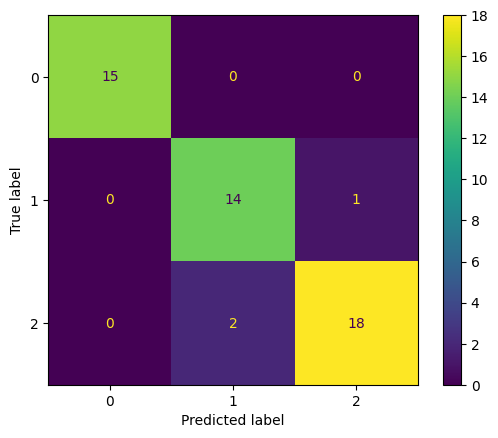

In [51]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,f1_score

In [16]:
lr=LogisticRegression(random_state=0,solver='liblinear',C=10)
lr=lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
f1=f1_score(Y_test,y_pred,average='micro')
print(f1)

0.98


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 20]])

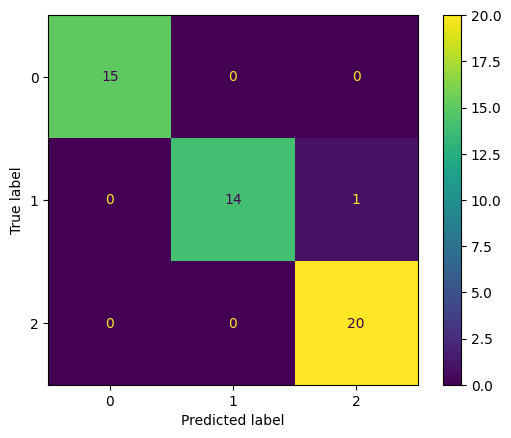

In [18]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()